# Clustering Anomaly Detection Exercise

Clustering - DBSCAN

Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [2]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

import env

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

## Acquire

In [3]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/grocery_db'
query = '''
SELECT * from grocery_customers
'''
df = pd.read_sql(query, url)
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
# choose features to cluster
cluster_features = df[['Fresh','Delicassen','Grocery']]

In [11]:
# make scaler
scaler = MinMaxScaler()

# fit scaler
scaler.fit(cluster_features)

# use scaler
fresh_deli_grocery = scaler.transform(cluster_features)
fresh_deli_grocery

array([[0.11294004, 0.02784731, 0.08146416],
       [0.06289903, 0.03698373, 0.10309667],
       [0.05662161, 0.16355861, 0.08278992],
       ...,
       [0.1295431 , 0.03888194, 0.32594285],
       [0.091727  , 0.04426366, 0.02402535],
       [0.02482434, 0.00102211, 0.02702178]])

In [19]:
# make DBSCAN
dbsc = DBSCAN(eps = .05, min_samples = 20)

# fit DBSCAN
dbsc.fit(fresh_deli_grocery)

DBSCAN(eps=0.05, min_samples=20)

In [20]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["Fresh", "Delicassen", "Grocery"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(fresh_deli_grocery, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,Scaled_Fresh,Scaled_Delicassen,Scaled_Grocery
0,0,2,3,12669,9656,7561,214,2674,1338,0,0.112940,0.027847,0.081464
1,1,2,3,7057,9810,9568,1762,3293,1776,0,0.062899,0.036984,0.103097
2,2,2,3,6353,8808,7684,2405,3516,7844,0,0.056622,0.163559,0.082790
3,3,1,3,13265,1196,4221,6404,507,1788,0,0.118254,0.037234,0.045464
4,4,2,3,22615,5410,7198,3915,1777,5185,0,0.201626,0.108093,0.077552


In [21]:
# Assign the cluster labels
# Recall that cluster labels don't have inherent meaning
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    356
-1     84
Name: labels, dtype: int64

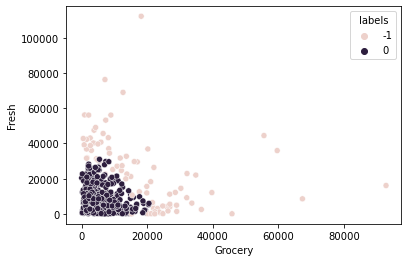

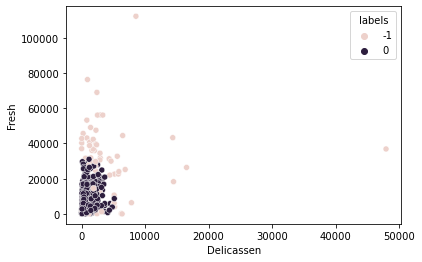

<AxesSubplot:xlabel='Grocery', ylabel='Delicassen'>

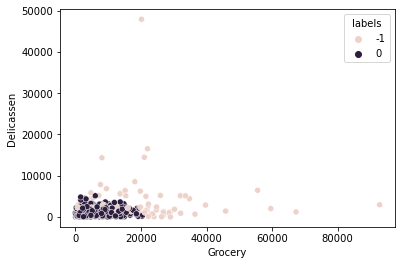

In [22]:
sns.scatterplot(df.Grocery, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Delicassen, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Grocery, df.Delicassen, hue=df.labels)

Text(0.5, 0, 'Grocery')

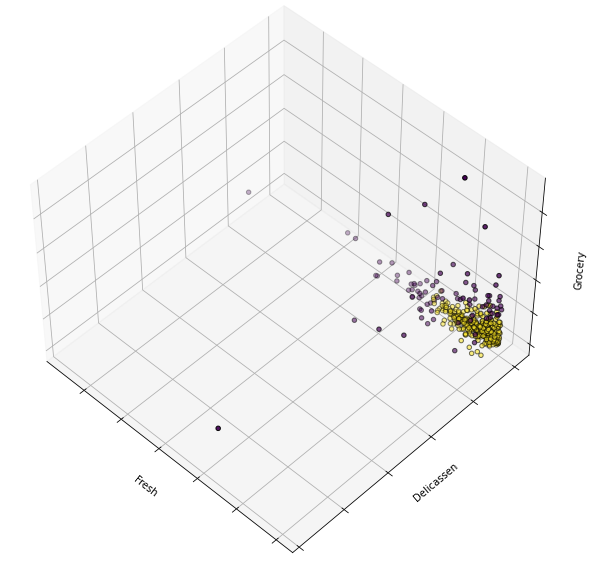

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Delicassen, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Delicassen')
ax.set_zlabel('Grocery')